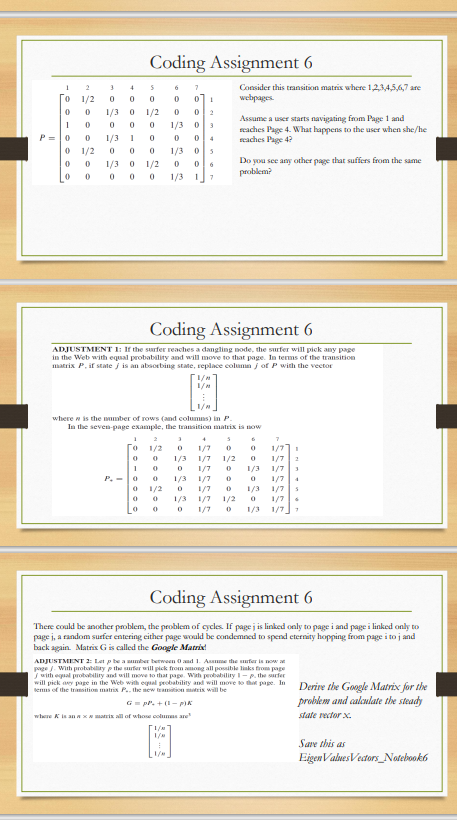

In [12]:
from IPython.display import Image
image_path=r"C:\Users\MUTHU SELVI\Pictures\Screenshots\ass6.png"
Image(image_path)

In [2]:
import numpy as np
import random

In [4]:
# Transition matrix
P = np.array([[0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [1, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 1, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 1]])
P

array([[0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.5       ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.5       ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ]])

In [6]:
# Function to identify dangling nodes
def dangling_nodes(matrix):
    d_nodes = []
    for i in range(len(matrix)):
        if matrix[i][i] == 1:
            d_nodes.append(i)
    return d_nodes
# Identifying dangling nodes
n = dangling_nodes(P)


[3, 6]

In [8]:
# Function to adjust the transition matrix for dangling nodes
def adjustment1(matrix, d_nodes):
    for i in range(len(matrix)):
        if i in d_nodes:
            for j in range(len(matrix[0])):
                matrix[j][i] = 1/len(matrix)
    return matrix
# Adjusting the transition matrix for dangling nodes
m1 = adjustment1(P, n)
m1

array([[0.        , 0.5       , 0.        , 0.14285714, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.33333333, 0.14285714, 0.5       ,
        0.        , 0.14285714],
       [1.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.33333333, 0.14285714],
       [0.        , 0.        , 0.33333333, 0.14285714, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.5       , 0.        , 0.14285714, 0.        ,
        0.33333333, 0.14285714],
       [0.        , 0.        , 0.33333333, 0.14285714, 0.5       ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.33333333, 0.14285714]])

In [10]:

# Random transition probability matrix
K = 1/len(m1) / np.ones((len(m1), len(m1)))

# Random probability p for the Google matrix
p = random.uniform(0.6, 0.9)

# Function to adjust the Google matrix
def adjustment2(matrix, p, K):
    result = p * matrix + (1 - p) * K
    return result

# Adjusting the Google matrix
m2 = adjustment2(m1, p, K)
m2

array([[0.01873801, 0.45315497, 0.01873801, 0.14285714, 0.01873801,
        0.01873801, 0.14285714],
       [0.01873801, 0.01873801, 0.30834932, 0.14285714, 0.45315497,
        0.01873801, 0.14285714],
       [0.88757192, 0.01873801, 0.01873801, 0.14285714, 0.01873801,
        0.30834932, 0.14285714],
       [0.01873801, 0.01873801, 0.30834932, 0.14285714, 0.01873801,
        0.01873801, 0.14285714],
       [0.01873801, 0.45315497, 0.01873801, 0.14285714, 0.01873801,
        0.30834932, 0.14285714],
       [0.01873801, 0.01873801, 0.30834932, 0.14285714, 0.45315497,
        0.01873801, 0.14285714],
       [0.01873801, 0.01873801, 0.01873801, 0.14285714, 0.01873801,
        0.30834932, 0.14285714]])

In [11]:

# Function to find the steady-state vector
def steady_state_vector(vector, A):
    n = 100
    count = 0
    vector = np.array(vector)  # Convert vector to numpy array
    for i in range(n):
        pvector = np.round(np.dot(A, vector), 8)
        if np.array_equal(vector, pvector):
            count += 1
        else:
            count = 0
        if count == 10:
            print("Number of iterations:", i)
            break
        vector = pvector
    print(vector)
    print("\nRank of each page")
    for i in range(len(vector)):
        print(f"Page {i+1}: {vector[i]}")



# Finding the steady-state vector
a = [1, 0, 0, 0, 0, 0, 0]
steady_state_vector(a, m2)


Number of iterations: 34
[0.11575484 0.16933297 0.1918062  0.09774297 0.16479558 0.16933297
 0.09123447]

Rank of each page
Page 1: 0.11575484
Page 2: 0.16933297
Page 3: 0.1918062
Page 4: 0.09774297
Page 5: 0.16479558
Page 6: 0.16933297
Page 7: 0.09123447
